# Reported UFO Sightings: United States of America 1994-2018


This report is an an analysis of reported UFO sightings in the United States of America, between 1994 and 2018. 

## Analysis Goal

The goal of the analysis is to provide a state by state summary of the most likely month, day, and time of a reported UFO sighting. This will also include the most likely type of UFO encounter which will include the most likely sighting duration, UFO shape, colour, and number of witnessess (solo or group).

## Data Sources
The source data comes from the website of the The National UFO Reporting Center. http://www.nuforc.org/

Contrary to its name, the site is a volunteer led organisation and is not an official US Federal Government entity. 

All UFO reports are user submitted to the website both electronically and via a telephone hotline. 

The key information that is captured in the reports are
* The date and time of the sighting
* The location of the sighting
* The overall shape of the UFO
* The duration of the encounter
* A summary of the encounter
* The date of publication on the website

The data used in this report has been scraped directly from the National UFO Reporting Center website. This scraping of data is within in permitted rights of the web site. Please see the following for additional information: http://www.nuforc.org/General.html

The geographic data files are from US Federal Government Census Bureau 
https://www2.census.gov/geo/tiger/TIGER2018/STATE/

### Data Caveats

* Documented encounters outside of the contiguous 48 states of the USA are excluded from this analysis.
* The data from the NUFORC website is curated before publication 
* Much of the orignal data is submitted as free text. This raises challenges in deriving qualitative data from quantative sources. Please see the readme.txt file that accompanies this report for additional information on methods and assumptions. 


## Report Outline

1. Backround data import and environment setup
2. Data overview
    * Number of reported UFO sightings by year
    * Number of reported UFO sightings by State
3. UFO sightings 
    * When are the UFO sightings documented?
    * What are people seeing during these UFO sightings?
    * How many witnesses to each UFO sghting?
    * How long to the UFO sightings last?
4. Most likley UFO sightings
    * Most likely month for a UFO sighting by state
    * Most likely weekday for a UFO sighting by state
    * Most likley time of day for a UFO sighting by state
    * Most likely duration of a UFO sighting by state
    * Most likely UFO shape sighted by state
    * Most likley UFO colour sighted by state
5. Summary of most likely UFO sighting by state
 

## 1 - Background data import and environment setup

In [1]:
#imports requisite libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
#opens the UFO Data (csv file) as a data frame
df = pd.read_csv('UFO_observations_1994_2018_3.csv', index_col=0)

#converts the date strings into date/time formatted objects
df["Date and Time"] = pd.to_datetime(df["Date and Time"])
df["Date Posted"] = pd.to_datetime(df["Date Posted"])

#scripts to clean up the dates as anything before 1970 is being automatically assigned to the future.
#i.e.: 1/1/46 is turning into 1/1/2047 - see source below 
#https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year

from datetime import datetime, timedelta, date
future = df["Date and Time"] > date(year=2019,month=1,day=1)
df.loc[future, "Date and Time"] -= timedelta(days=365*100)

#tidy up of any NaN values in any cells
for col in df.columns:
    df[col] = df[col].replace(np.nan, "")


C:\Users\chris\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  del sys.path[0]


In [3]:
#creates useful time columns for the analysis

df['Year'] = df['Date and Time'].dt.year
df['Minute'] = df['Date and Time'].dt.minute
df['Hour'] = df['Date and Time'].dt.hour
df['Sighting Month'] = df['Date and Time'].dt.month_name()


In [4]:
#sets the filepath and loads in a shapefile as a dataframe for creating the geopandas plots.

#this filepath will need to be altered from environment to environment

fp = "C:/Users/chris/Desktop/Data Programming/Coursework 2/Submission/tl_2018_us_state/tl_2018_us_state.shp"
map_df = gpd.read_file(fp)

#creates a list of the contiguous 48 US States for the report
US_states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
#filters out any shapes states/US territories outside of the the contiguous 48 states
map_df = map_df[map_df['STUSPS'].isin(US_states)]


## 2 - Data Overview

### 2.1 Number of reported UFO sightings by year



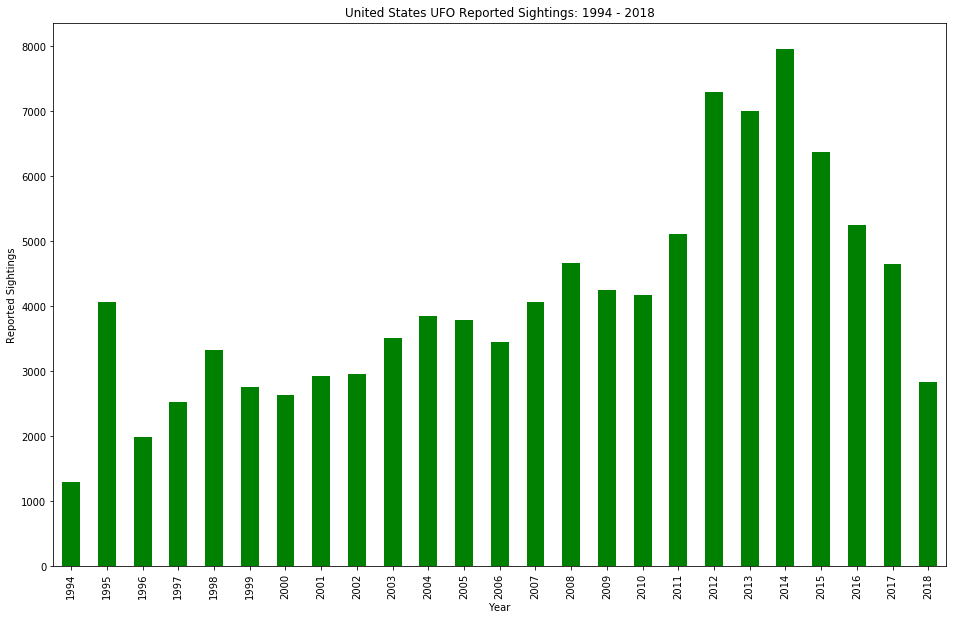

In [5]:
#summarises the data into annual counts of UFO reports and plots results
annualsummary = df.groupby(['Year']).size().sort_index()
plt.title('United States UFO Reported Sightings: 1994 - 2018')
plt.xlabel('Year')
plt.ylabel('Reported Sightings')
annualsummary.plot(kind='bar',figsize=[16,10], color='green')
plt.show()

####  Comments

Overall reports of UFO sightings submitted to the site have been increasing since 1994 with peak reporting coming in 2014. 

Reporting seems to have dropped off over the past 4 years and this may be due to increased reporting/discussion of UFO sightings onto other more informal channels.

### 2.2 Number of reported UFO sightings by State

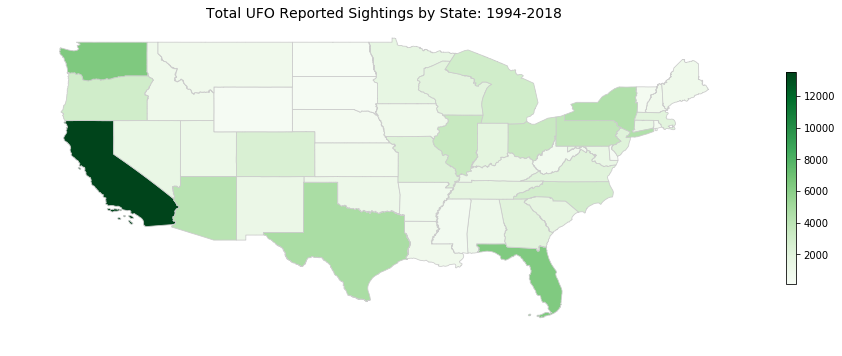

In [6]:
#creates a summary Dataframe to use for this graph
statecounts = df.groupby('State')[['Summary']].count()
statecounts.columns = ['Total Sightings']
#merges with geopgraphic data
merged = map_df.set_index('NAME').join(statecounts)
#sets the variable to visualise
variable = 'Total Sightings'
fig, ax = plt.subplots(1, figsize=(16,6))
ax.axis('off')
#sets the range for the colourbar as the min and max values of the variable
vmin = merged[variable].min()
vmax = merged[variable].max()
#creates colourbar & sets and empty array to hold the data
cb = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb._A = []
#adds the colorbar to the figure
cbar = fig.colorbar(cb, shrink = .65)
#adds additional data 
ax.set_title('Total UFO Reported Sightings by State: 1994-2018',fontdict={'fontsize': '14', 'fontweight' : '3'})
merged.plot(column= variable, cmap='Greens', ax=ax, linewidth=0.8, edgecolor='0.8')
plt.show()

Top 10 States by number of UFO sightings

In [7]:
statecounts.sort_values(by='Total Sightings', ascending=False, inplace = True)
statecounts.head(10)

,Total Sightings
State,
California,13528
Washington,6456
Florida,6388
Texas,4740
New York,4460
Arizona,4161
Pennsylvania,3758
Illinois,3535
Ohio,3444


Distribution of UFO sightings 

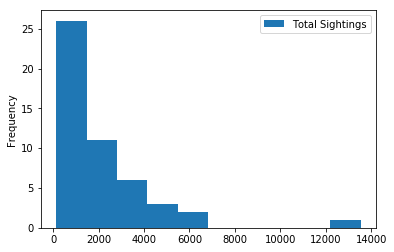

In [8]:
statecounts.plot.hist()

#### Commentary

California has more than double the amount of UFO sightings of any other state wheras the rest are more evenly distrubted.

Interestingly, 8 out of top 10 states for UFO sightings are also in the top of 10 of states by population

https://www.worldatlas.com/articles/us-states-by-population.html



## 3 - UFO sightings


### 3.1 When do UFO sightings happen?

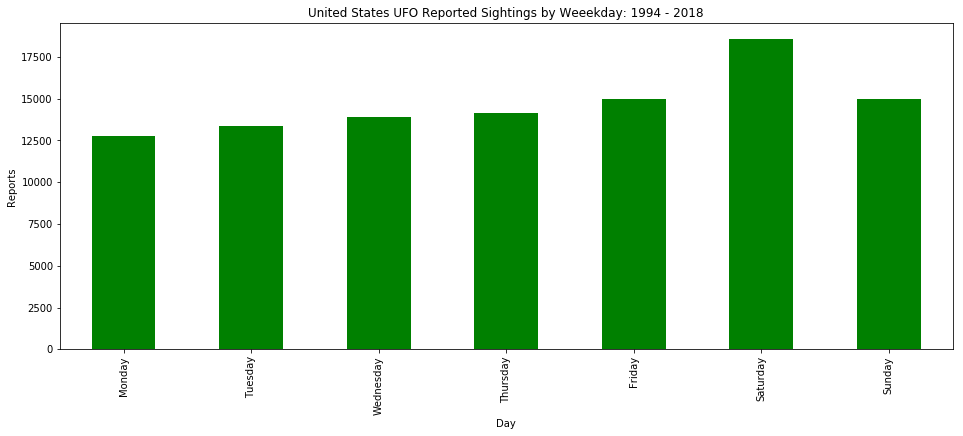

In [9]:
# Plots the reported sightings by days of the week 
days = df.groupby(['Sighting Day']).size()
#used to order the x-plot in the graphs
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days.loc[week].plot.bar(figsize=[16,6], color = 'green')
plt.title('United States UFO Reported Sightings by Weeekday: 1994 - 2018')
plt.xlabel('Day')
plt.ylabel('Reports')
plt.show()

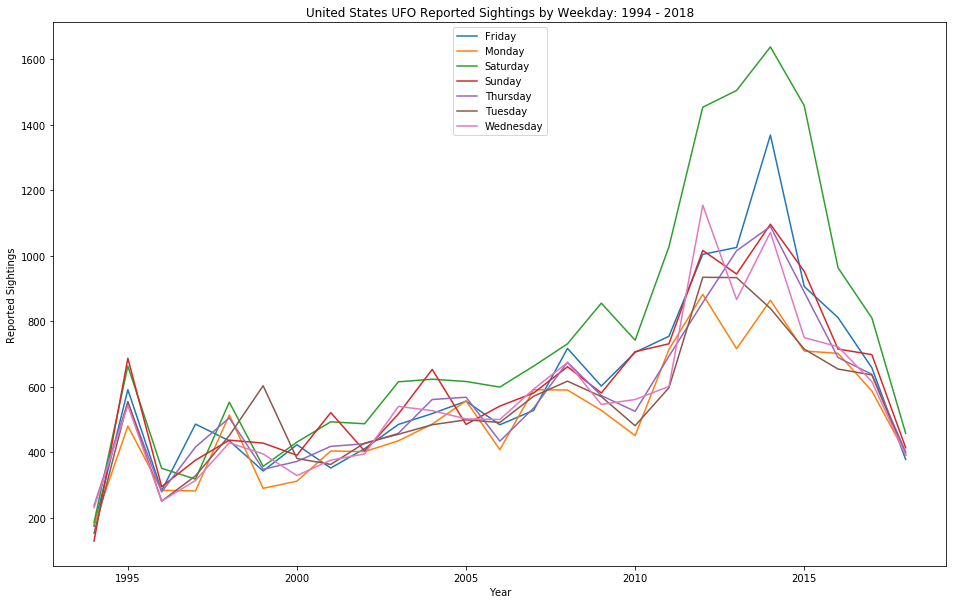

In [10]:
daystrend = df.groupby(['Year', 'Sighting Day'], as_index = False)[['Summary']].count()
fig, ax = plt.subplots()
daystrend.groupby('Sighting Day').plot(x = 'Year', y='Summary', ax=ax, figsize=[16,10],legend=False)
plt.title('United States UFO Reported Sightings by Weekday: 1994 - 2018')
plt.xlabel('Year')
plt.ylabel('Reported Sightings')
slegend = df['Sighting Day'].unique()
slegend.sort()
plt.legend(slegend, loc=9)
plt.show()

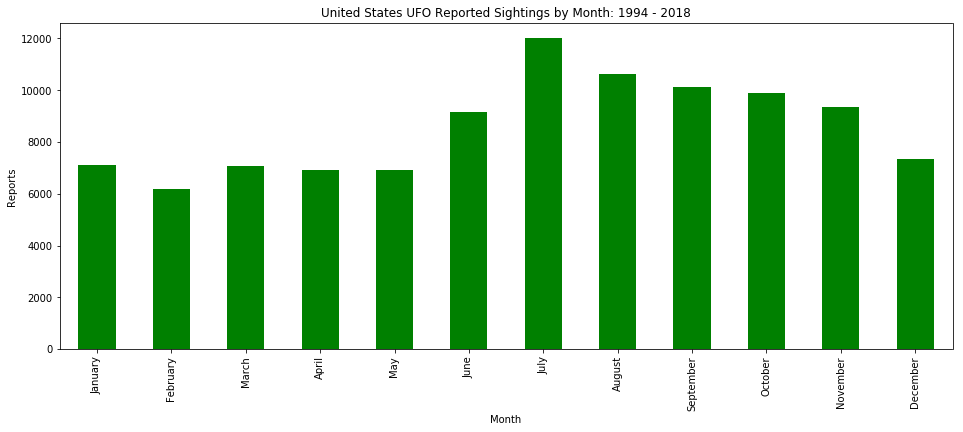

In [11]:
# Plots the reported sightings by month
days = df.groupby(['Sighting Month']).size()
#used to order the x-plot in the graphs
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
        "November", "December"]
days.loc[month].plot.bar(figsize=[16,6], color = 'green')
plt.title('United States UFO Reported Sightings by Month: 1994 - 2018')
plt.xlabel('Month')
plt.ylabel('Reports')
plt.show()

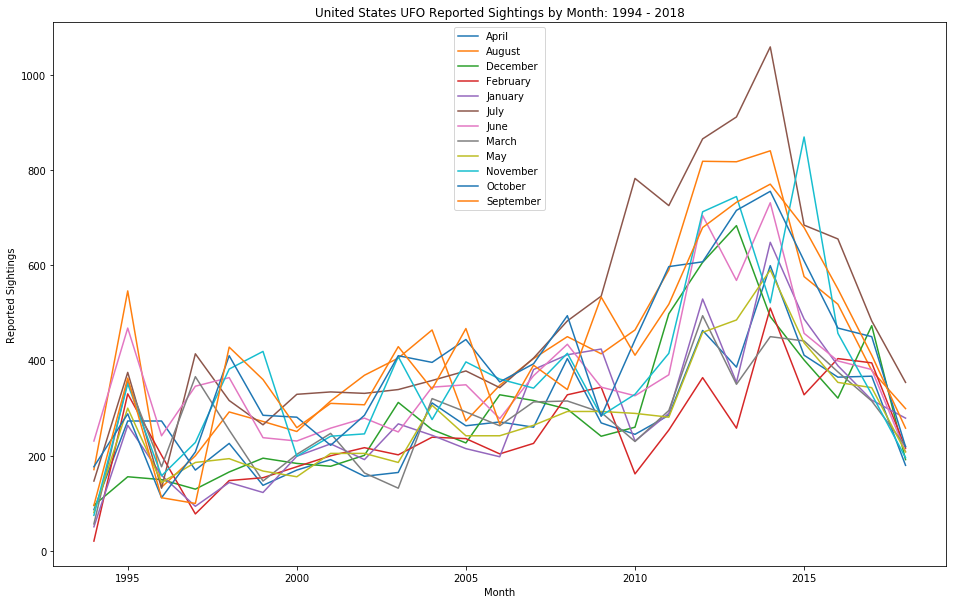

In [12]:
#plots monthly reporting trends

monthtrend = df.groupby(['Year', 'Sighting Month'], as_index = False)[['Summary']].count()
fig, ax = plt.subplots()
monthtrend.groupby('Sighting Month').plot(x = 'Year', y='Summary', ax=ax, figsize=[16,10],legend=False)
plt.title('United States UFO Reported Sightings by Month: 1994 - 2018')
plt.xlabel('Month')
plt.ylabel('Reported Sightings')
slegend = df['Sighting Month'].unique()
slegend.sort()
plt.legend(slegend, loc=9)
plt.show()

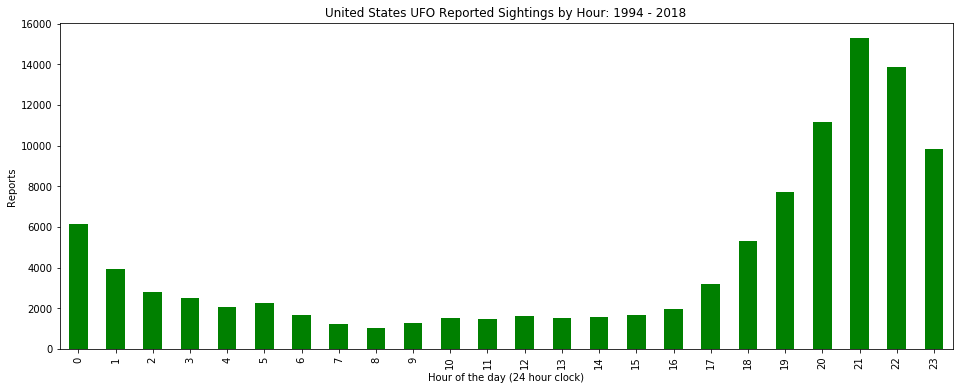

In [13]:
# Plots the reported sightings by hour of the day
hours = df.groupby(['Hour']).size()
hours.plot.bar(figsize=[16,6], color = 'green')
plt.title('United States UFO Reported Sightings by Hour: 1994 - 2018')
plt.xlabel('Hour of the day (24 hour clock)')
plt.ylabel('Reports')
plt.show()

#### Commentary

The weekends (comprising Friday-Sunday) are the most common days for sightings although it is only in the past 10 years or so when Saturday sightings begin to dominate the reports. 

There appears to be some slight seasonality to the UFO sightings as reports are skewed towards the summer and autumn months.  July has only become a more common month for reports over the past 10 years. 

The time of the day for the reports is heavily skewed to nighttime hours, with very few reports from daylight hours.

### 3.2 What are people seeing during these UFO sightings?



### Most frequently reported UFO Shapes

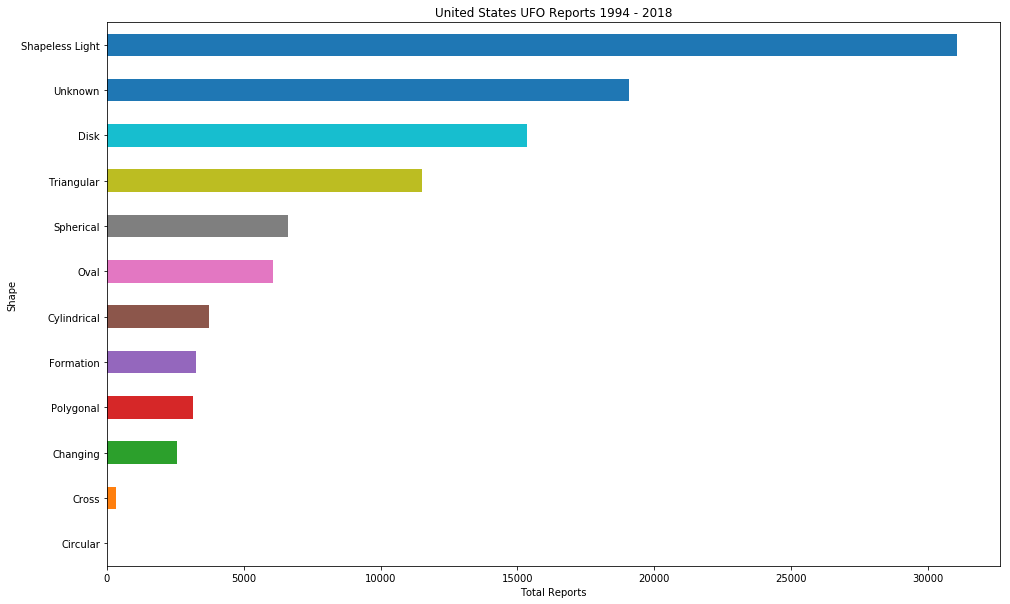

In [14]:

sizedf = df.groupby('Shape').size().sort_values()
plt.title('United States UFO Reports 1994 - 2018')
plt.xlabel('Total Reports')
plt.ylabel('Shape')
sizedf.plot(kind='barh',figsize=[16,10])
plt.show()

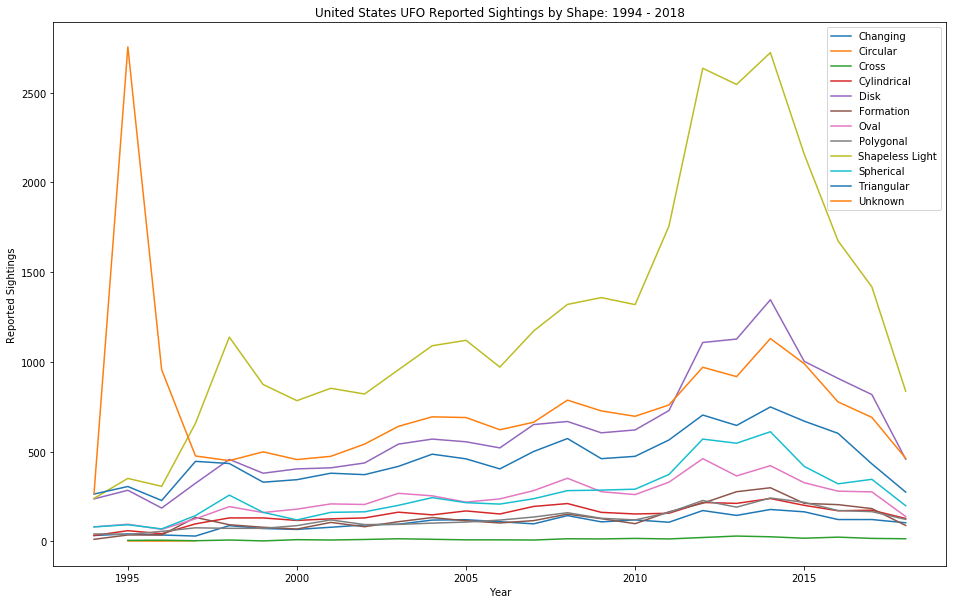

In [15]:
shapes = df.groupby(['Year', 'Shape'], as_index = False)[['Summary']].count()
fig, ax = plt.subplots()
shapes.groupby('Shape').plot(x = 'Year', y='Summary', ax=ax, figsize=[16,10],legend=False)
plt.title('United States UFO Reported Sightings by Shape: 1994 - 2018')
plt.xlabel('Year')
plt.ylabel('Reported Sightings')
slegend = df['Shape'].unique()
slegend.sort()
plt.legend(slegend, loc='best')
plt.show()


#### Commentary

Shape seems to be very hard to determine for UFOs however this is not surprising given the prevalence of reports during nighttime hours. 

Where a definite shape is reported, rounded shapes (cylindrical, rounded, oval, speherical) are more common than polygons.  

There does not appear to be a trend for any particular UFO shape over time. 

### Most frequently reported UFO Colours

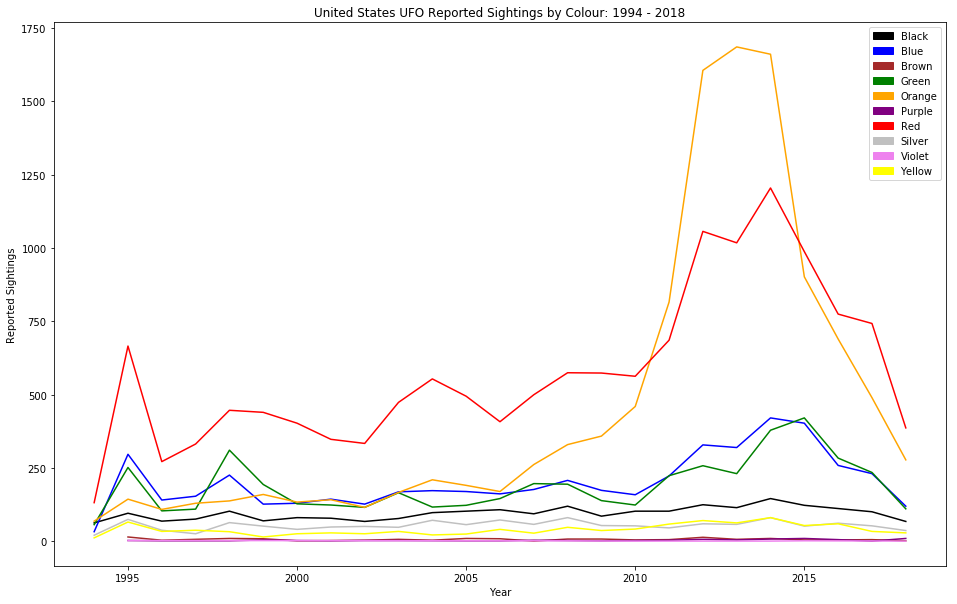

In [16]:
from cycler import cycler

df_colour = df[df['Colour'] != "None"]

black_patch = mpatches.Patch(color='black', label='Black')
blue_patch = mpatches.Patch(color='blue', label='Blue')
brown_patch = mpatches.Patch(color='brown', label='Brown')
green_patch = mpatches.Patch(color='green', label='Green')
orange_patch = mpatches.Patch(color='orange', label='Orange')
purple_patch = mpatches.Patch(color='purple', label='Purple')
red_patch = mpatches.Patch(color='red', label='Red')
silver_patch = mpatches.Patch(color='silver', label='Silver')
violet_patch = mpatches.Patch(color='violet', label='Violet')
yellow_patch = mpatches.Patch(color='yellow', label='Yellow')


all_colours = [black_patch, blue_patch, brown_patch, green_patch, orange_patch, purple_patch, red_patch,
               silver_patch, violet_patch, yellow_patch]

df_colour2 = df_colour.groupby(['Colour', 'Year'], as_index = False)[['Summary']].count()
colour_list = df_colour2['Colour'].unique()
fig, ax = plt.subplots()
ax.set_prop_cycle(color = colour_list)
df_colour2.groupby('Colour').plot(x ='Year', y='Summary', ax=ax, figsize=[16,10])
plt.title('United States UFO Reported Sightings by Colour: 1994 - 2018')
plt.xlabel('Year')
plt.ylabel('Reported Sightings')
plt.legend(handles = all_colours, loc='best')

plt.show()




In [17]:
#calculates % of UFO reports that mention colour in the text

print(len(df_colour)/len(df.index))


0.39555122900949136


#### Commentary 

Only 39.5% of the reports mention a colour in the Summary of the sighting. 

Red and orange dominate as colours associated with UFO sightings.

### 3.3 - How many witnesses to each UFO sighting?



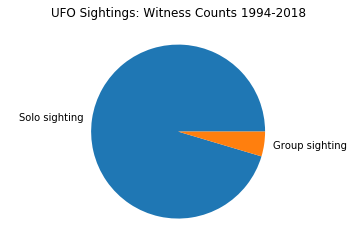

In [18]:
values = (df[df['Witnesses'] == 'Solo'].count()['Summary'],df[df['Witnesses'] != 'Solo'].count()['Summary'])
labels = ("Solo sighting", "Group sighting")

fig, ax = plt.subplots()
ax.axis('equal')
ax.pie(values, labels = labels)
plt.title('UFO Sightings: Witness Counts 1994-2018')

plt.show()

#### Commentary

Overwhelming the Sightings seem to be by individuals rather than by groups of people 

### 3.4 - How long do the UFO sightings last?

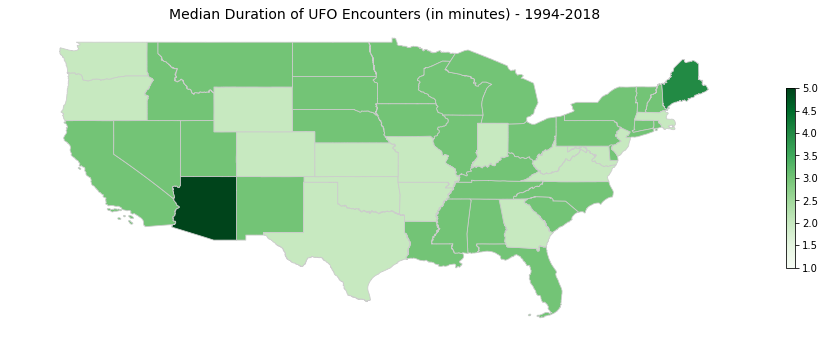

In [19]:
statedurationmedian = df.groupby('State')[['Total_Duration']].median()

merged = map_df.set_index('NAME').join(statedurationmedian)
# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Duration'

# set the range for the choropleth
vmin = merged[variable].min()
vmax = merged[variable].max()

fig, ax = plt.subplots(1, figsize=(16,6))
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink = .55)

ax.set_title('Median Duration of UFO Encounters (in minutes) - 1994-2018', fontdict={'fontsize': '14', 'fontweight' : '3'})
merged.plot(column= variable, cmap='Greens', ax=ax, linewidth=0.8, edgecolor='0.8')
plt.show()

#### Commentary

Encounters seem to last between 90-180 seconds. Arizona and Maine are the two states where UFO encounters seem to last the longest.   

## 4 - Most likley UFO sightings

### 4.1 - Most likely month for a UFO sighting by state


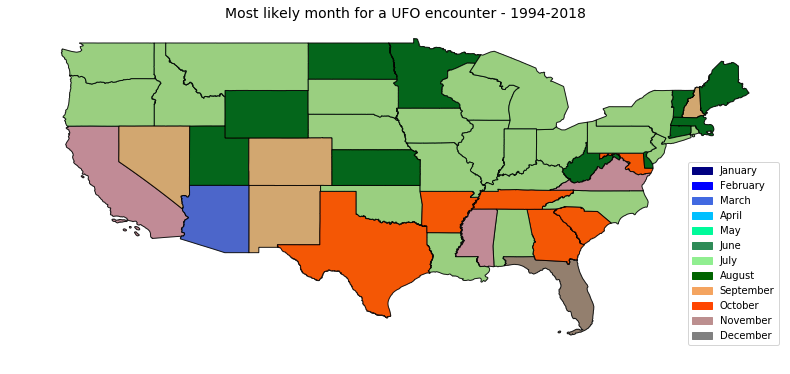

In [20]:

Month_Colours = {
 'January': 'navy',
 'February': 'blue',
 'March' : 'royalblue',
 'April' : 'deepskyblue',
 'May' : 'mediumspringgreen',
 'June': 'seagreen',
 'July' : 'lightgreen',
 'August' : 'darkgreen',
 'September' : 'sandybrown',
 'October': 'orangered',
 'November': 'rosybrown',
 'December': 'gray'}
    
january_patch = mpatches.Patch(color='navy', label='January')
february_patch = mpatches.Patch(color='blue', label='February')
march_patch = mpatches.Patch(color='royalblue', label='March')
april_patch = mpatches.Patch(color='deepskyblue', label='April')
may_patch = mpatches.Patch(color='mediumspringgreen', label='May')
june_patch = mpatches.Patch(color='seagreen', label='June')
july_patch = mpatches.Patch(color='lightgreen', label='July')
august_patch = mpatches.Patch(color='darkgreen', label='August')
september_patch = mpatches.Patch(color='sandybrown', label='September')
october_patch = mpatches.Patch(color='orangered', label='October')
november_patch = mpatches.Patch(color='rosybrown', label='November')
december_patch = mpatches.Patch(color='gray', label='December')

monthhandles = [january_patch, february_patch, march_patch, april_patch, may_patch, june_patch, july_patch,
               august_patch, september_patch, october_patch, november_patch, december_patch]

commonmonth = df.groupby('State')[['Sighting Month']].apply(lambda x: x.mode().iloc[0])
commonmonth['Colour'] = commonmonth['Sighting Month']
commonmonth['Colour'].replace(Month_Colours, inplace=True)
merged = map_df.set_index('NAME').join(commonmonth)

# code adapted from https://stackoverflow.com/questions/53142563/coloring-specific-countries-with-geopandas
from descartes import PolygonPatch

def StatePatch( axes, state_name, fcolor ):
    # plot a state on the provided axes
    nami = map_df[map_df['NAME'] == state_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

variable = 'Sighting Month'
fig, ax = plt.subplots(1, figsize=(14,6))
ax.axis('off')
ax.set_title('Most likely month for a UFO encounter - 1994-2018', fontdict={'fontsize': '14', 'fontweight' : '3'})
ax2 = merged.plot(column = variable, ax=ax, linewidth=0.8, edgecolor='0.8')
plt.legend(handles = monthhandles)
for x in merged.index:
    StatePatch(ax2, x, merged.loc[x,'Colour'])
plt.show()

#### Commentary

Summer and early Autumn are the most likely times to see UFOs. This seasonality may be correlated wiht the weather:
the more people that are outsise, the more likely they are are to see UFOs.

### 4.2 Most likely weekday for a UFO sighting by state
 

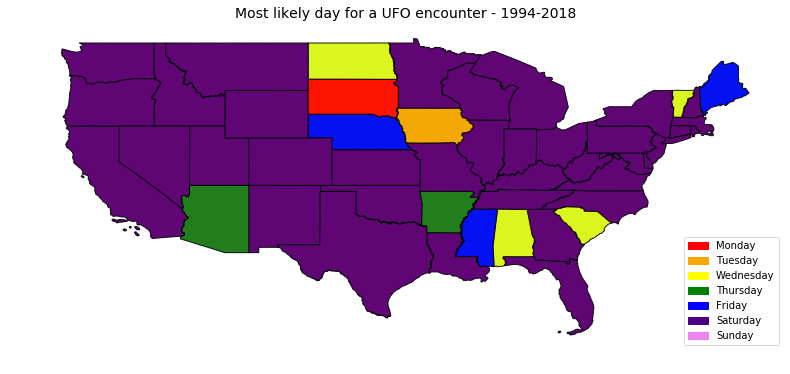

In [21]:
Day_Colours = {
 'Monday': 'red',
 'Tuesday': 'orange',
 'Wednesday': 'yellow',
 'Thursday': 'green',
 'Friday': 'blue',
 'Saturday': 'indigo',
 'Sunday': 'violet'}

monday_patch = mpatches.Patch(color='red', label='Monday')
tuesday_patch = mpatches.Patch(color='orange', label='Tuesday')
wednesday_patch = mpatches.Patch(color='yellow', label='Wednesday')
thursday_patch = mpatches.Patch(color='green', label='Thursday')
friday_patch = mpatches.Patch(color='blue', label='Friday')
saturday_patch = mpatches.Patch(color='indigo', label='Saturday')
sunday_patch = mpatches.Patch(color='violet', label='Sunday')

weekdayhandles = [monday_patch, tuesday_patch, wednesday_patch, thursday_patch,friday_patch, saturday_patch, sunday_patch]
commondays = df.groupby('State')[['Sighting Day']].apply(lambda x: x.mode().iloc[0])
commondays['Colour'] = commondays['Sighting Day']
commondays['Colour'].replace(Day_Colours, inplace=True)
merged = map_df.set_index('NAME').join(commondays)

# code adapted from https://stackoverflow.com/questions/53142563/coloring-specific-countries-with-geopandas
from descartes import PolygonPatch
def StatePatch( axes, state_name, fcolor ):
    # plot a state on the provided axes
    nami = map_df[map_df['NAME'] == state_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

    
# set a variable that will call whatever column we want to visualise on the map
variable = 'Sighting Day'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Most likely day for a UFO encounter - 1994-2018', fontdict={'fontsize': '14', 'fontweight' : '3'})
ax2 = merged.plot(column = variable, ax=ax, linewidth=0.8, edgecolor='0.8')
plt.legend(handles = weekdayhandles)
for x in merged.index:
    StatePatch(ax2, x, merged.loc[x,'Colour'])
plt.show()

#### Commentary

Saturday completely dominates this category although ~8% of States (North Dakota, Mississippi, South Carolina and Vermont) are most likely to see a mid-week UFO

### 4.3 Most likley time of day for a UFO sighting by state


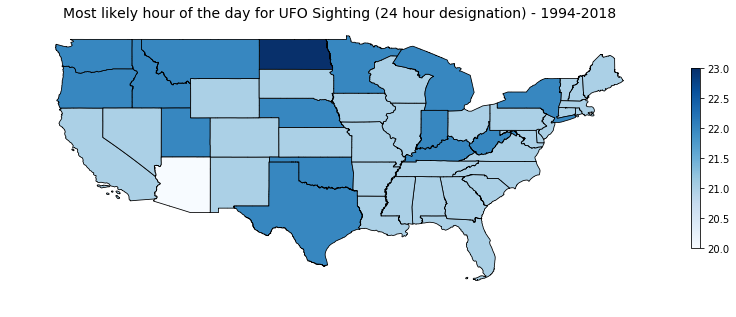

In [22]:
statetime = df.groupby('State')[['Hour']].apply(lambda x: x.mode().iloc[0])
merged = map_df.set_index('NAME').join(statetime)
# set a variable that will call whatever column we want to visualise on the map
variable = 'Hour'

# set the range for the choropleth
vmin = merged[variable].min()
vmax = merged[variable].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))

# create map

# remove the axis
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink = .55)

# add a title
ax.set_title('Most likely hour of the day for UFO Sighting (24 hour designation) - 1994-2018', 
             fontdict={'fontsize': '14', 'fontweight' : '3'})
merged.plot(column= variable, cmap='Blues', ax=ax, linewidth=0.8, edgecolor='k')
plt.show()

#### Commentary

Sightings are most likely between 9pm and 11pm. Given the prevalence of summer/autumn months, this would place these sighting closest to twilight lighting conditions. 

### 4.4 Most common UFO colour by state

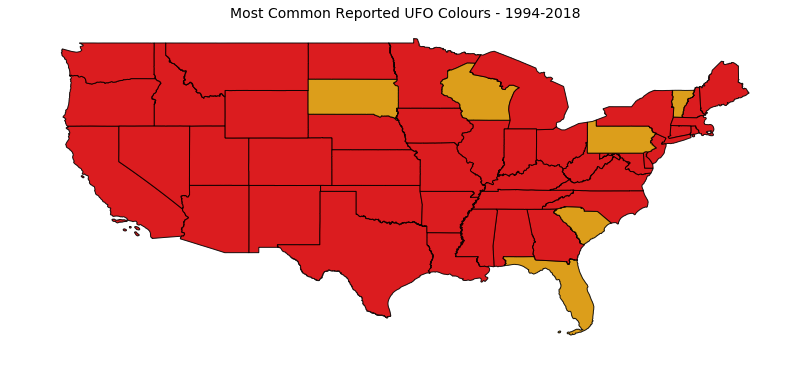

In [23]:
df_colour = df[df['Colour'] != "None"]
statecolours = df_colour.groupby('State')[['Colour']].apply(lambda x: x.mode().iloc[0])
merged = map_df.set_index('NAME').join(statecolours)

# code adapted from https://stackoverflow.com/questions/53142563/coloring-specific-countries-with-geopandas
from descartes import PolygonPatch
def StatePatch( axes, state_name, fcolor ):
    # plot a state on the provided axes
    nami = map_df[map_df['NAME'] == state_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

    
# set a variable that will call whatever column we want to visualise on the map
variable = 'Colour'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))
# remove the axis
ax.axis('off')
# add a title
ax.set_title('Most Common Reported UFO Colours - 1994-2018', fontdict={'fontsize': '14', 'fontweight' : '3'})
# create an annotation for the data source
ax2 = merged.plot(column = variable, ax=ax, linewidth=0.8, edgecolor='0.8')

for x in merged.index:
    StatePatch(ax2, x, merged.loc[x,'Colour'])

plt.show()

### Most common duration of a UFO sighting by state
 

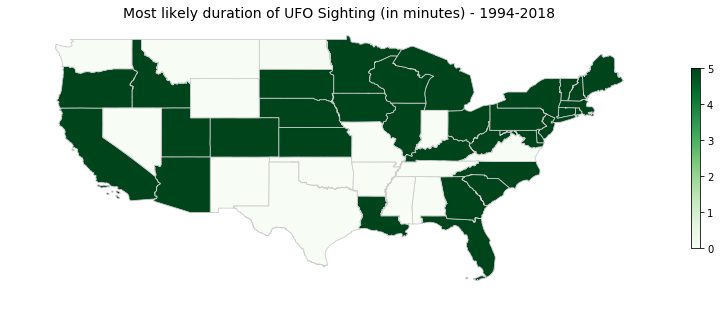

In [24]:

statedurationmode = df.groupby('State')[['Total_Duration']].apply(lambda x: x.mode().iloc[0])

merged = map_df.set_index('NAME').join(statedurationmode)
# set a variable that will call whatever column we want to visualise on the map
variable = 'Total_Duration'

# set the range for the choropleth
vmin = merged[variable].min()
vmax = merged[variable].max()

fig, ax = plt.subplots(1, figsize=(14,6))
ax.axis('off')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, shrink = .55)
ax.set_title('Most likely duration of UFO Sighting (in minutes) - 1994-2018', 
             fontdict={'fontsize': '14', 'fontweight' : '3'})
merged.plot(column= variable, cmap='Greens', ax=ax, linewidth=0.8, edgecolor='0.8')
plt.show()

#### Commentary

Most common durations are pretty polarised; multiple states below the 1 minute mark with the rest closer to 5 minutes.

## Summary of most likely UFO sighting by state

In [25]:
common = commonmonth.copy()
common = pd.merge(common, commondays, right_index=True, left_index=True)
common = pd.merge(common, statetime, right_index=True, left_index=True)
common = pd.merge(common, statecolours, right_index=True, left_index=True)
common = pd.merge(common, statedurationmode, right_index=True, left_index=True)
common = common.drop(['Colour_x'], axis = 1)
common = common.drop(['Colour_y'], axis = 1)

common.head(51)

,Sighting Month,Sighting Day,Hour,Colour,Total_Duration
State,,,,,
Alabama,July,Wednesday,21,red,0.000000
Arizona,March,Thursday,20,red,5.000000
Arkansas,October,Thursday,21,red,0.000000
California,November,Saturday,21,red,5.000000
Colorado,September,Saturday,21,red,5.000000
Connecticut,August,Saturday,21,red,5.000000
Delaware,August,Saturday,21,red,5.000000
District of Columbia,July,Sunday,20,red,0.000000
Florida,December,Saturday,21,orange,5.000000


# Summary

On the available data here, your best chance of spotting a UFO in the contiguous 48 US states is on a July, Saturday night between 9p-11pm local time. You are most likely to be on your own and spot an indistinct red light for a period of less one minute.  

## Scope for future work

The data availble on the website could use futher refinement to tease out additional details. Most notably
 * expand the scope of key words pulled from the sighting summary
 * further refine the duration extract to improve the sighting duration
 * examine the outliers in detail to see if the outlier data can either be cleansed or used as a subset for additional insight 
 * improve the level of detail by mapping reported locations and looking at the each state on a county level
 